In [42]:
using Pkg; Pkg.activate(".")
using Plots, ACE1pack 

  Activating project at `~/gits/ACE1pack.jl/scripts/plotRn`


In [36]:
function get_Pr(p, q, r0, rcut)
    basis = ACE1x.ace_basis(; elements = [:Si,], order = 2, totaldegree = 6, r0 = r0, rcut = rcut, 
                              pair_transform = (:agnesi, p, q), 
                              pair_envelope = (:r, 1) )
    Pr = basis.BB[1].J[1,1]
    env = Pr.envelope
    rr = range(0.01, rcut, length=400)
    vals = ACE1.evaluate.(Ref(Pr), rr)
    vals2 = [ [vals[j][i] / ACE1.evaluate(Pr.envelope, rr[j]) for j = 1:length(vals) ] 
              for i = 1:length(vals[1]) ]
    return rr, vals2 
end

get_Pr (generic function with 1 method)

┌ Warning: automatic inverse not implemented, inverse will return NaN
└ @ ACE1.Transforms ~/.julia/packages/ACE1/7qXJp/src/polynomials/transforms.jl:270


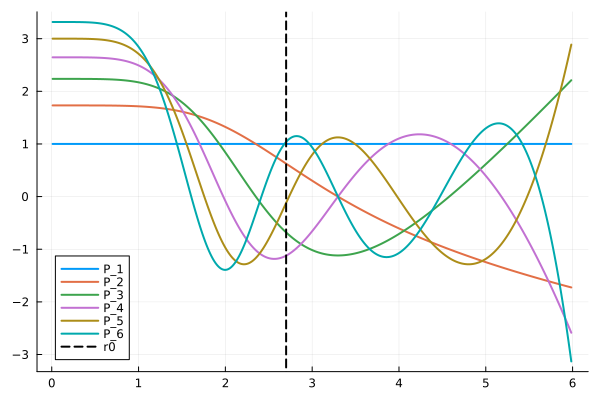

In [41]:
r0 = 2.7; rcut = 6.0 
rr, Pr = get_Pr(1, 5, r0, rcut)
plt = plot()
for n = 1:6 
    plot!(plt, rr, Pr[n], lw=2, label = "P_$n")
end
vline!([r0,], lw=2, ls = :dash, c= :black, label = "r0")
plt